In [1]:
class Consumer:
    def __init__(self, wtp, delta, is_delta):
        self.wtp = wtp
        self.delta = delta
        self.traded = False
        self.consecutive_trades = 0
        self.prices = []
        self.surplus = []
        self.delta_scale = is_delta

    def update_wtp(self):
        if not self.traded:
            if self.delta_scale:
                self.wtp *= (1 + self.delta)
            else:
                self.wtp += 10


In [2]:
class Producer:
    def __init__(self, wta, delta, is_delta):
        self.wta = wta
        self.delta = delta
        self.traded = False
        self.consecutive_trades = 0
        self.prices = []
        self.surplus = []
        self.price_group = ""
        self.delta_scale = is_delta

    def update_wta(self):
        if not self.traded:
            if self.delta_scale:
                self.wta *= (1 - self.delta)
            else:
                self.wta -= 10

In [3]:
from PyQt5 import QtCore, QtGui, QtWidgets

class Ui_Dialog(object):
    def setupUi(self, Dialog):
        ####
        self.rounds = 150
        self.consumers = 100
        self.producers = 100
        self.is_delta = False
        self.delta = 0.1
        self.plots = []
        self.normal_dist = False
        self.ran = False
        ####
        Dialog.setObjectName("Dialog")
        Dialog.resize(445, 325)
        Dialog.setFixedWidth(445)
        Dialog.setFixedHeight(325)
        self.groupBox = QtWidgets.QGroupBox(Dialog)
        self.groupBox.setGeometry(QtCore.QRect(260, 10, 160, 200))
        self.groupBox.setObjectName("groupBox")
        self.checkBox = QtWidgets.QCheckBox(self.groupBox)
        self.checkBox.setGeometry(QtCore.QRect(10, 20, 100, 15))
        self.checkBox.setObjectName("checkBox")
        self.checkBox_2 = QtWidgets.QCheckBox(self.groupBox)
        self.checkBox_2.setGeometry(QtCore.QRect(10, 50, 130, 17))
        self.checkBox_2.setObjectName("checkBox_2")
        self.checkBox_3 = QtWidgets.QCheckBox(self.groupBox)
        self.checkBox_3.setGeometry(QtCore.QRect(10, 80, 120, 17))
        self.checkBox_3.setObjectName("checkBox_3")
        self.checkBox_4 = QtWidgets.QCheckBox(self.groupBox)
        self.checkBox_4.setGeometry(QtCore.QRect(10, 110, 140, 17))
        self.checkBox_4.setObjectName("checkBox_4")
        self.checkBox_5 = QtWidgets.QCheckBox(self.groupBox)
        self.checkBox_5.setGeometry(QtCore.QRect(10, 140, 120, 17))
        self.checkBox_5.setObjectName("checkBox_5")
        self.checkBox_6 = QtWidgets.QCheckBox(self.groupBox)
        self.checkBox_6.setGeometry(QtCore.QRect(10, 170, 130, 17))
        self.checkBox_6.setObjectName("checkBox_6")
        self.groupBox_2 = QtWidgets.QGroupBox(Dialog)
        self.groupBox_2.setGeometry(QtCore.QRect(20, 10, 220, 161))
        self.groupBox_2.setObjectName("groupBox_2")
        self.horizontalSlider_2 = QtWidgets.QSlider(self.groupBox_2)
        self.horizontalSlider_2.setGeometry(QtCore.QRect(70, 30, 130, 22))
        self.horizontalSlider_2.setStyleSheet("")
        self.horizontalSlider_2.setOrientation(QtCore.Qt.Horizontal)
        self.horizontalSlider_2.setObjectName("horizontalSlider_2")
        self.horizontalSlider = QtWidgets.QSlider(self.groupBox_2)
        self.horizontalSlider.setGeometry(QtCore.QRect(70, 75, 130, 22))
        self.horizontalSlider.setOrientation(QtCore.Qt.Horizontal)
        self.horizontalSlider.setObjectName("horizontalSlider")
        self.horizontalSlider_3 = QtWidgets.QSlider(self.groupBox_2)
        self.horizontalSlider_3.setGeometry(QtCore.QRect(70, 120, 130, 22))
        self.horizontalSlider_3.setOrientation(QtCore.Qt.Horizontal)
        self.horizontalSlider_3.setObjectName("horizontalSlider_3")

        ####
        self.horizontalSlider_2.setMinimum(25)
        self.horizontalSlider_2.setMaximum(500)
        self.horizontalSlider_3.setMinimum(10)
        self.horizontalSlider_3.setMaximum(200)
        self.horizontalSlider.setMinimum(10)
        self.horizontalSlider.setMaximum(200)
        ####

        self.label = QtWidgets.QLabel(self.groupBox_2)
        self.label.setGeometry(QtCore.QRect(10, 32, 47, 13))
        self.label.setObjectName("label")
        self.label_2 = QtWidgets.QLabel(self.groupBox_2)
        self.label_2.setGeometry(QtCore.QRect(10, 75, 61, 16))
        self.label_2.setObjectName("label_2")
        self.label_3 = QtWidgets.QLabel(self.groupBox_2)
        self.label_3.setGeometry(QtCore.QRect(10, 120, 51, 16))
        self.label_3.setObjectName("label_3")
        self.label_6 = QtWidgets.QLabel(self.groupBox_2)
        self.label_6.setGeometry(QtCore.QRect(70, 55, 47, 13))
        self.label_6.setObjectName("label_6")
        self.label_7 = QtWidgets.QLabel(self.groupBox_2)
        self.label_7.setGeometry(QtCore.QRect(70, 100, 47, 13))
        self.label_7.setObjectName("label_7")
        self.label_8 = QtWidgets.QLabel(self.groupBox_2)
        self.label_8.setGeometry(QtCore.QRect(70, 145, 47, 13))
        self.label_8.setObjectName("label_8")
        self.label_9 = QtWidgets.QLabel(self.groupBox_2)
        self.label_9.setGeometry(QtCore.QRect(185, 55, 47, 13))
        self.label_9.setObjectName("label_9")
        self.label_10 = QtWidgets.QLabel(self.groupBox_2)
        self.label_10.setGeometry(QtCore.QRect(185, 100, 47, 13))
        self.label_10.setObjectName("label_10")
        self.label_11 = QtWidgets.QLabel(self.groupBox_2)
        self.label_11.setGeometry(QtCore.QRect(185, 145, 47, 13))
        self.label_11.setObjectName("label_11")
        self.groupBox_3 = QtWidgets.QGroupBox(Dialog)
        self.groupBox_3.setGeometry(QtCore.QRect(20, 180, 221, 105))
        self.groupBox_3.setObjectName("groupBox_3")
        self.checkBox_7 = QtWidgets.QCheckBox(self.groupBox_3)
        self.checkBox_7.setGeometry(QtCore.QRect(20, 30, 151, 17))
        self.checkBox_7.setObjectName("checkBox_7")
        self.label_4 = QtWidgets.QLabel(self.groupBox_3)
        self.label_4.setGeometry(QtCore.QRect(20, 60, 30, 16))
        self.label_4.setObjectName("label_4")

        self.label_12 = QtWidgets.QLabel(self.groupBox_3)
        self.label_12.setGeometry(QtCore.QRect(60, 85, 47, 13))
        self.label_12.setObjectName("label_12")

        self.label_13 = QtWidgets.QLabel(self.groupBox_3)
        self.label_13.setGeometry(QtCore.QRect(175, 85, 47, 13))
        self.label_13.setObjectName("label_13")

        self.horizontalSlider_4 = QtWidgets.QSlider(self.groupBox_3)
        self.horizontalSlider_4.setGeometry(QtCore.QRect(60, 60, 131, 22))
        self.horizontalSlider_4.setOrientation(QtCore.Qt.Horizontal)
        self.horizontalSlider_4.setObjectName("horizontalSlider_4")

        #####
        self.horizontalSlider_4.setMinimum(0)
        self.horizontalSlider_4.setMaximum(100)
        ####

        self.progressBar = QtWidgets.QProgressBar(Dialog)
        self.progressBar.setGeometry(QtCore.QRect(120, 290, 118, 23))
        self.progressBar.setProperty("value", 24)
        self.progressBar.setObjectName("progressBar")
        self.pushButton = QtWidgets.QPushButton(Dialog)
        self.pushButton.setGeometry(QtCore.QRect(340, 290, 75, 23))
        self.pushButton.setObjectName("pushButton")
        self.label_5 = QtWidgets.QLabel(Dialog)
        self.label_5.setGeometry(QtCore.QRect(20, 292, 101, 16))
        self.label_5.setObjectName("label_5")
        self.groupBox_4 = QtWidgets.QGroupBox(Dialog)
        self.groupBox_4.setGeometry(QtCore.QRect(260, 220, 161, 51))
        self.groupBox_4.setObjectName("groupBox_4")
        self.comboBox = QtWidgets.QComboBox(self.groupBox_4)
        self.comboBox.setGeometry(QtCore.QRect(20, 20, 121, 22))
        self.comboBox.setObjectName("comboBox")
        self.comboBox.addItem("")
        self.comboBox.addItem("")
        self.pushButton_2 = QtWidgets.QPushButton(Dialog)
        self.pushButton_2.setGeometry(QtCore.QRect(250, 290, 75, 23))
        self.pushButton_2.setAutoDefault(True)
        self.pushButton_2.setFlat(False)
        self.pushButton_2.setObjectName("pushButton_2")
        self.groupBox_2.raise_()
        self.groupBox.raise_()
        self.groupBox_3.raise_()
        self.progressBar.raise_()
        self.pushButton.raise_()
        self.label_5.raise_()
        self.groupBox_4.raise_()
        self.pushButton_2.raise_()

        ####
        self.label_5.hide()
        self.progressBar.hide()
        ####

        self.retranslateUi(Dialog)
        QtCore.QMetaObject.connectSlotsByName(Dialog)

        self.pushButton.clicked.connect(lambda: Dialog.close())
        self.pushButton_2.clicked.connect(self.run)
        self.pushButton_2.clicked.connect(lambda: Dialog.close())

    def run(self):
        self.ran = True
        self.rounds = self.horizontalSlider_2.value()
        self.consumers = self.horizontalSlider.value()
        self.producers = self.horizontalSlider_3.value()
        self.delta = self.horizontalSlider_4.value() / 100
        self.is_delta = self.checkBox_7.isChecked()

        check_boxes = [self.checkBox, self.checkBox_2, self.checkBox_3, self.checkBox_4, self.checkBox_5, self.checkBox_6]
        for i in range(len(check_boxes)):
            if check_boxes[i].isChecked():
                if i + 1 not in self.plots:
                    self.plots.append(i + 1)

        if self.comboBox.currentText() == "Normal Distribution":
            self.normal_dist = True
        else:
            self.normal_dist = False

        self.label_5.show()
        self.progressBar.setValue(0)
        self.progressBar.show()


    def retranslateUi(self, Dialog):
        _translate = QtCore.QCoreApplication.translate
        Dialog.setWindowTitle(_translate("Dialog", "Economic Market Simulator"))
        self.groupBox.setTitle(_translate("Dialog", "Choose Plots to Display"))
        self.checkBox.setText(_translate("Dialog", "Summary Plot"))
        self.checkBox_2.setText(_translate("Dialog", "Initial Supply/Demand"))
        self.checkBox_3.setText(_translate("Dialog", "Final Supply/Demand"))
        self.checkBox_4.setText(_translate("Dialog", "Transaction Price Boxplot"))
        self.checkBox_5.setText(_translate("Dialog", "Surplus Plots"))
        self.checkBox_6.setText(_translate("Dialog", "Producer Revenue"))
        self.groupBox_2.setTitle(_translate("Dialog", "Options"))
        self.label.setText(_translate("Dialog", "Rounds"))
        self.label_2.setText(_translate("Dialog", "Consumers"))
        self.label_3.setText(_translate("Dialog", "Producers"))
        self.label_6.setText(_translate("Dialog", "25"))
        self.label_7.setText(_translate("Dialog", "10"))
        self.label_8.setText(_translate("Dialog", "10"))
        self.label_9.setText(_translate("Dialog", "500"))
        self.label_10.setText(_translate("Dialog", "200"))
        self.label_11.setText(_translate("Dialog", "200"))
        self.label_12.setText(_translate("Dialog", "0.0"))
        self.label_13.setText(_translate("Dialog", "1.0"))
        self.groupBox_3.setTitle(_translate("Dialog", "Delta Scaling"))
        self.checkBox_7.setText(_translate("Dialog", "Enable Delta Scaling"))
        self.label_4.setText(_translate("Dialog", "Delta"))
        self.pushButton.setText(_translate("Dialog", "Quit"))
        self.label_5.setText(_translate("Dialog", "Running Simulation:"))
        self.groupBox_4.setTitle(_translate("Dialog", "WTA/WTP Distribution"))
        self.comboBox.setItemText(0, _translate("Dialog", "Uniform Distribution"))
        self.comboBox.setItemText(1, _translate("Dialog", "Normal Distribution"))
        self.pushButton_2.setText(_translate("Dialog", "Run"))


In [4]:
from PyQt5 import QtWidgets
from MainWindow import Ui_Dialog
import sys


class ApplicationWindow(QtWidgets.QMainWindow):
    def __init__(self):
        super(ApplicationWindow, self).__init__()

        self.ui = Ui_Dialog()
        self.ui.setupUi(self)


#def main():
    #app = QtWidgets.QApplication(sys.argv)
    #application = ApplicationWindow()
    #application.show()
    #sys.exit(app.exec_())


#if __name__ == "__main__":
#    main()


In [5]:
from random import *
from Consumer import *
from Producer import *
from ApplicationWindow import *
from statistics import *
import numpy as np
import matplotlib.pyplot as plt
import sys
from PyQt5.QtCore import Qt
from PyQt5.QtGui import *
from PyQt5.QtWidgets import *

In [6]:
def generate_population(num_con, num_prod, is_delta, delta, norm_dist):
    consumers = []
    producers = []
    wtps = []
    wtas = []
    min_wtp = float('inf')
    max_wtp = -float('inf')
    min_wta = float('inf')
    max_wta = -float('inf')
    for i in range(num_con):
        if norm_dist:
            wtp = np.random.normal(300, 100)
        else:
            wtp = np.random.uniform(0, 600)
        if wtp < min_wtp:
            min_wtp = wtp
        if wtp > max_wtp:
            max_wtp = wtp
        wtps.append(wtp)
        consumers.append(Consumer(wtp, delta, is_delta))
    for i in range(num_prod):
        if norm_dist:
            wta = np.random.normal(500, 100)
        else:
            wta = np.random.uniform(200, 800)
        if wta > max_wta:
            max_wta = wta
        if wta < min_wta:
            min_wta = wta
        wtas.append(wta)
        producers.append(Producer(wta, delta, is_delta))
    return consumers, producers, wtps, wtas, min_wtp, max_wtp, min_wta, max_wta

In [7]:
def simulate_round(consumers, producers):
    still_trading = True
    prices = []
    traded_consumers = []
    traded_producers = []
    consumer_surplus = []
    producer_surplus = []
    wtp_price_dict = {}
    for con in consumers:
        if con.traded:
            con.traded = False
        else:
            con.consecutive_trades = 0
    for prod in producers:
        if prod.traded:
            prod.traded = False
        else:
            prod.consecutive_trades = 0
    while still_trading:
        valid_trade = False
        if len(consumers) > 0 and len(producers) > 0:
            for con in consumers:
                for prod in producers:
                    if con.wtp > prod.wta:
                        valid_trade = True
        if not valid_trade:
            still_trading = False
            break
        consumer = choice(consumers)
        producer = choice(producers)
        if consumer.wtp > producer.wta:
            price = uniform(producer.wta, consumer.wtp)
            #price = consumer.wtp
            #price = producer.wta
            prices.append(price)
            consumer.prices.append(price)
            producer.prices.append(price)
            consumer_surplus.append(consumer.wtp - price)
            consumer.surplus.append(consumer.wtp - price)
            producer_surplus.append(price - producer.wta)
            producer.surplus.append(price - producer.wta)
            wtp_price_dict[consumer.wtp] = price
            #wtp_price_dict[producer.wta] = price
            consumer.traded = True
            consumer.consecutive_trades += 1
            producer.traded = True
            producer.consecutive_trades += 1
            traded_consumers.append(consumer)
            consumers.remove(consumer)
            traded_producers.append(producer)
            producers.remove(producer)
    for no_trade_con in consumers:
        no_trade_con.prices.append(0)
        no_trade_con.surplus.append(0)
        wtp_price_dict[no_trade_con.wtp] = -100
    for no_trade_prod in producers:
        no_trade_prod.prices.append(0)
        no_trade_prod.surplus.append(0)
    consumers += traded_consumers
    producers += traded_producers
    for con in consumers:
        con.update_wtp()
    for prod in producers:
        prod.update_wta()
    return consumers, producers, prices, consumer_surplus, producer_surplus, wtp_price_dict

In [8]:
def simulate_n_rounds(n, consumers, producers):
    prices = []
    cons_surplus = []
    prod_surplus = []
    start_price_prod = {}
    end_price_prod = {}
    for i in range(n):
        print("round", i)
        consumers, producers, round_prices, c_surplus, p_surplus, wtp_price_dict = simulate_round(consumers, producers)
        prices.append(round_prices)
        cons_surplus.append(c_surplus)
        prod_surplus.append(p_surplus)
        if i == 0:
            tup = zip(round_prices, p_surplus)
            start_price_prod = dict(tup)
            sorted_initial_wtp_price_dict = dict(sorted(wtp_price_dict.items(), reverse=True))
        elif i == n - 1:
            tup = zip(round_prices, p_surplus)
            end_price_prod = dict(tup)
            sorted_final_wtp_price_dict = dict(sorted(wtp_price_dict.items(), reverse=True))
    return consumers, producers, prices, cons_surplus, prod_surplus, start_price_prod, end_price_prod, \
           sorted_initial_wtp_price_dict, sorted_final_wtp_price_dict

In [9]:
def summary_plot(prices, num_agents, box_plot):
    averages = []
    standard_devs = []
    num_trades = []
    for p in prices:
        averages.append(mean(p))
        standard_devs.append(pstdev(p))
        num_trades.append(2*len(p)/num_agents)
    x_vals = list(range(1, len(averages) + 1))
    fig, axs = plt.subplots(2, sharex='all')
    axs[0].set_title("Standard Deviation of Prices by Round")
    axs[0].plot(x_vals, standard_devs)
    axs[0].set_ylabel('SD ($)')
    axs[1].set_title("Proportion of Individuals Trading Each Round")
    axs[1].plot(x_vals, num_trades)
    axs[1].set_ylabel('Number of Individuals')
    fig.text(0.5, 0.04, 'Round', ha='center')

In [10]:
def box_plot(prices):
    plot_rounds = [prices[i] for i in range(len(prices)) if i % (len(prices) // 25) == 0]
    plt.figure()
    plt.boxplot(plot_rounds, sym='')
    plt.xlabel('Round')
    plt.ylabel('Price')
    plt.title('Boxplot of Transaction Prices By Round')
    x_vals, labels = plt.xticks()
    new_x_vals = len(prices) // 25 * x_vals
    plt.xticks(x_vals, new_x_vals, rotation='vertical')

In [11]:
def supply_demand(wtps, wtas, min_wtp, max_wtp, min_wta, max_wta, prices, prices2, title):
    quantities = {}
    price_range = np.linspace(min(min_wtp, min_wta), max(max_wta, max_wtp), 100)
    min_diff = float('inf')
    min_diff_price = 0
    min_diff_quantity = 0
    for price in price_range:
        demand_i = len([wtp for wtp in wtps if wtp >= price])
        supply_i = len([wta for wta in wtas if wta <= price])
        quantities[price] = [demand_i, supply_i]
        if abs(demand_i - supply_i) < min_diff:
            min_diff = abs(demand_i - supply_i)
            min_diff_price = price
            min_diff_quantity = mean([demand_i, supply_i])
    s_d = list(quantities.values())
    demand = ([item[0] for item in s_d])
    supply = ([item[1] for item in s_d])
    plt.figure()
    plt.plot(supply, price_range,  label='Supply')
    plt.plot(demand, price_range, label='Demand')
    plt.xlabel('Quantity')
    plt.ylabel('Price')
    plt.title(title)
    plt.plot(0, min_diff_quantity)
    plt.plot([min_diff_quantity, min_diff_quantity], [0, min_diff_price], linestyle='dashed', color='r')
    plt.plot([0, min_diff_quantity], [min_diff_price, min_diff_price], linestyle='dashed', color='r')
    x = list(range(1, len(prices) + 1))
    x2 = list(range(1, len(prices2) + 1))
    plt.scatter(x, prices, s=10, c="green", label="Transaction Prices (Start)")
    plt.scatter(x2, prices2, s=5, c="purple", label="Transaction Prices (End)")
    plt.scatter(min_diff_quantity, min_diff_price, s=25, c="red", label='Equilibrium', zorder=10)
    plt.legend()
    plt.annotate(str((min_diff_quantity, round(min_diff_price, 2))), (min_diff_quantity, min_diff_price),
                 xytext=(10, 0), textcoords='offset points')
    x1, x2, y1, y2 = plt.axis()
    plt.axis((0, x2, 0, y2))

In [12]:
def utility(cons_surpluses, prod_surpluses, start_prod, end_prod, num_prod):
    fig, axs = plt.subplots(2, sharex='all')
    cons_total = [sum(rd) for rd in cons_surpluses]
    prod_total = [sum(rd) for rd in prod_surpluses]
    cons_averages = [mean(rd) for rd in cons_surpluses]
    prod_averages = [mean(rd) for rd in prod_surpluses]
    axs[0].set_title("Average Surplus by Round")
    axs[0].plot(cons_averages, label='Consumer')
    axs[0].plot(prod_averages, label='Producer')
    axs[0].legend()
    axs[1].set_title("Total Surplus by Round")
    axs[1].plot(cons_total, label='Consumer')
    axs[1].plot(prod_total, label='Producer')
    axs[1].legend()
    fig.text(0.5, 0.04, 'Round', ha='center')
    fig.text(0.04, 0.5, 'Surplus ($)', va='center', rotation='vertical')

In [13]:
def end_preferences(consumers, producers):
    wtps = []
    wtas = []
    min_wtp = float('inf')
    max_wtp = -float('inf')
    min_wta = float('inf')
    max_wta = -float('inf')
    for consumer in consumers:
        wtps.append(consumer.wtp)
        if consumer.wtp < min_wtp:
            min_wtp = consumer.wtp
        if consumer.wtp > max_wtp:
            max_wtp = consumer.wtp
    for producer in producers:
        wtas.append(producer.wta)
        if producer.wta > max_wta:
            max_wta = producer.wta
        if producer.wta < min_wta:
            min_wta = producer.wta
    wtps.sort()
    wtas.sort()
    return wtps, wtas, min_wtp, max_wtp, min_wta, max_wta

In [14]:
def set_prod_flags(producers, wtas):
    wtas.sort()
    rnge = wtas[-1] - wtas[0]
    low_cutoff = (1 / 3) * rnge + wtas[0]
    mid_cutoff = (2 / 3) * rnge + wtas[0]
    for prod in producers:
        if 0 <= prod.wta < low_cutoff:
            prod.price_group = "L"
        elif low_cutoff <= prod.wta < mid_cutoff:
            prod.price_group = "M"
        elif mid_cutoff <= prod.wta:
            prod.price_group = "H"

In [15]:
def producer_surplus_over_time(producers, num_rounds):
    l_totals, l_avgs = [], []
    m_totals, m_avgs = [], []
    h_totals, h_avgs = [], []
    l_cumm, m_cumm, h_cumm = [], [], []
    l_count, m_count, h_count = 0, 0, 0
    for i in range(num_rounds):
        l_total, m_total, h_total = 0, 0, 0
        l_count, m_count, h_count = 0, 0, 0
        for prod in producers:
            if prod.price_group == "L":
                l_total += prod.prices[i]
                l_count += 1
            elif prod.price_group == "M":
                m_total += prod.prices[i]
                m_count += 1
            else:
                h_total += prod.prices[i]
                h_count += 1
        l_totals.append(l_total)
        m_totals.append(m_total)
        h_totals.append(h_total)
        l_avgs.append(l_total / l_count)
        m_avgs.append(m_total / m_count)
        h_avgs.append(h_total / h_count)
        if len(l_cumm) == 0:
            l_cumm.append(l_total)
            m_cumm.append(m_total)
            h_cumm.append(h_total)
        else:
            l_cumm.append(l_cumm[-1] + l_total / l_count)
            m_cumm.append(m_cumm[-1] + m_total / m_count)
            h_cumm.append(h_cumm[-1] + h_total / h_count)
    plt.figure()
    x = list(range(1, num_rounds + 1))
    plt.plot(x, l_totals, label="Low WTA (n="+str(l_count)+")")
    plt.plot(x, m_totals, label="Medium WTA (n="+str(m_count)+")")
    plt.plot(x, h_totals, label="High WTA (n="+str(h_count)+")")
    plt.title('Total Revenue By WTA Level')
    plt.xlabel('Round')
    plt.ylabel('Total Revenue ($)')
    plt.legend()
    plt.figure()
    plt.plot(x, l_avgs, label="Low WTA")
    plt.plot(x, m_avgs, label="Medium WTA")
    plt.plot(x, h_avgs, label="High WTA")
    plt.title('Average Revenue By WTA Level')
    plt.xlabel('Round')
    plt.ylabel('Average Revenue ($)')
    plt.legend()
    plt.figure()
    plt.plot(x, l_cumm, label="Low WTA")
    plt.plot(x, m_cumm, label="Medium WTA")
    plt.plot(x, h_cumm, label="High WTA")
    plt.title('Cumulative Average Revenue By WTA Level')
    plt.xlabel('Round')
    plt.ylabel('Cumulative Average Revenue ($)')
    plt.legend()

round 0
round 1
round 2
round 3
round 4
round 5
round 6
round 7
round 8
round 9
round 10
round 11
round 12
round 13
round 14
round 15
round 16
round 17
round 18
round 19
round 20
round 21
round 22
round 23
round 24
round 25
round 26
round 27
round 28
round 29
round 30
round 31
round 32
round 33
round 34
round 35
round 36
round 37
round 38
round 39
round 40
round 41
round 42
round 43
round 44
round 45
round 46
round 47
round 48
round 49
round 50
round 51
round 52
round 53
round 54
round 55
round 56
round 57
round 58
round 59
round 60
round 61
round 62
round 63
round 64
round 65
round 66
round 67
round 68
round 69
round 70
round 71
round 72
round 73
round 74
round 75
round 76
round 77
round 78
round 79
round 80
round 81
round 82
round 83
round 84
round 85
round 86
round 87
round 88
round 89
round 90
round 91
round 92
round 93
round 94
round 95
round 96
round 97
round 98
round 99
round 100
round 101
round 102
round 103
round 104
round 105
round 106
round 107
round 108
round 109
round 110


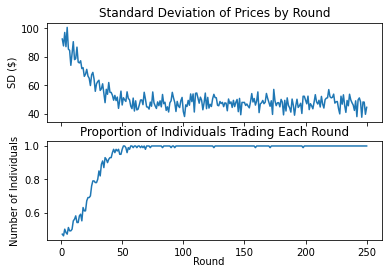

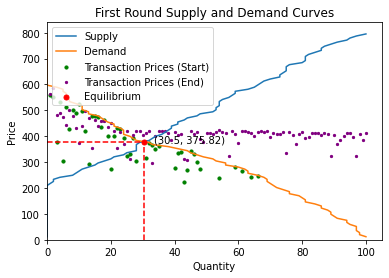

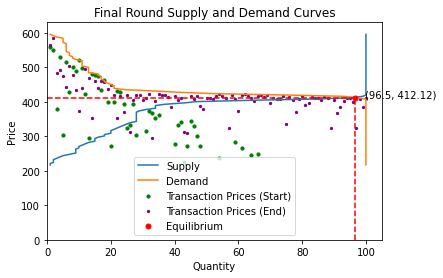

In [16]:
def main():
    app = QtWidgets.QApplication(sys.argv)
    application = ApplicationWindow()
    application.show()
    app.exec_()
    if application.ui.ran:
        num_con = application.ui.consumers
        num_prod = application.ui.producers
        delta = application.ui.delta
        num_rounds = application.ui.rounds
        is_delta = application.ui.is_delta
        norm_dist = application.ui.normal_dist
        plots = application.ui.plots
        num_con = 100
        num_prod = 100
        num_rounds = 250
        consumers, producers, wtps, wtas, min_wtp, max_wtp, min_wta, max_wta = \
            generate_population(num_con, num_prod, is_delta, delta, norm_dist)
        set_prod_flags(producers, wtas)
        consumers, producers, prices, cons_surpluses, prod_surpluses, start_prod, end_prod, sorted_initial_wtp_price_dict, \
            sorted_final_wtp_price_dict = simulate_n_rounds(num_rounds, consumers, producers)
        end_wtps, end_wtas, end_min_wtp, end_max_wtp, end_min_wta, end_max_wta = end_preferences(consumers, producers)
        if 1 in plots:
            summary_plot(prices, len(consumers) + len(producers), box_plot)
        if 2 in plots:
            supply_demand(wtps, wtas, min_wtp, max_wtp, min_wta, max_wta, list(sorted_initial_wtp_price_dict.values()),
                          list(sorted_final_wtp_price_dict.values()), "First Round Supply and Demand Curves")
        if 3 in plots:
            supply_demand(end_wtps, end_wtas, end_min_wtp, end_max_wtp, end_min_wta, end_max_wta,
                          list(sorted_initial_wtp_price_dict.values()), list(sorted_final_wtp_price_dict.values()),
                          "Final Round Supply and Demand Curves")
        if 4 in plots:
            box_plot(prices)
        if 5 in plots:
            utility(cons_surpluses, prod_surpluses, start_prod, end_prod, num_prod)
        if 6 in plots:
            producer_surplus_over_time(producers, num_rounds)
        plt.show()
        
main()